# Driver Laptimes Scatterplot

Plot a driver's lap times in a race, with color coding for the compounds.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

Load the race session.



In [2]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (113.51 MB) /home/rylei/.cache/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status da

Get all the laps for a single driver.
Filter out slow laps as they distort the graph axis.



In [3]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

Make the scattterplot using lap number as x-axis and lap time as y-axis.
Marker colors correspond to the compounds used.
Note: as LapTime is represented by timedelta, calling setup_mpl earlier
is required.



<Axes: xlabel='LapNumber', ylabel='LapTime'>

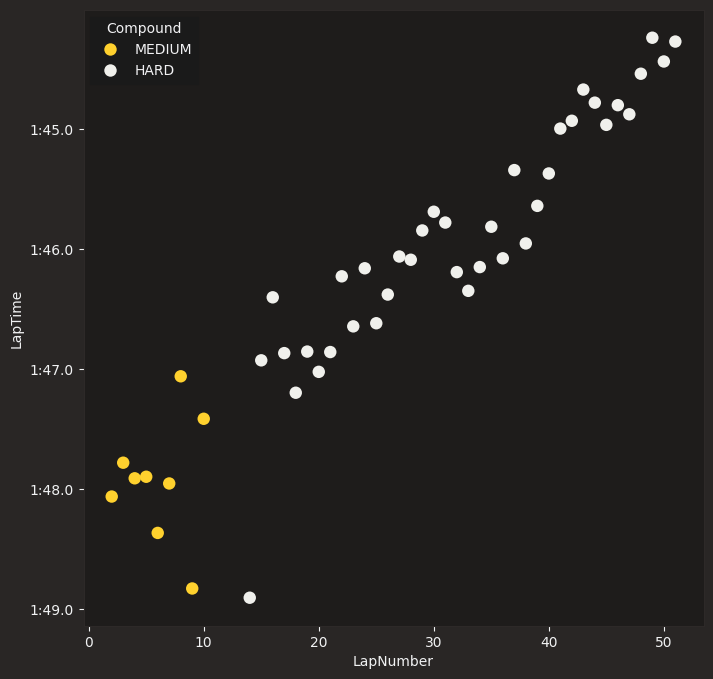

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

Make the plot more aesthetic.



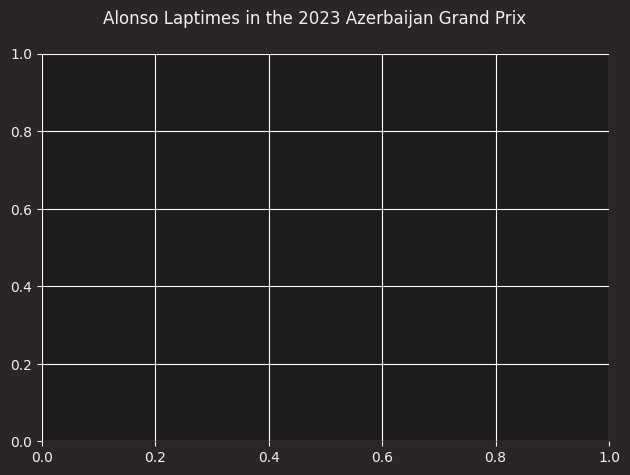

In [5]:
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()